In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import kernel
from deflected_subgradient import solveDeflected
from SVR import SVR
import matplotlib.pyplot as plt
import random
import copy

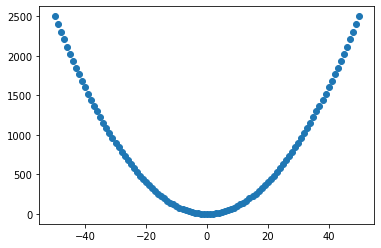

In [2]:
x = np.vstack(np.arange(-50,51,1))
degree = 2
noising_factor = 0.1
y = [xi**degree for xi in x]
# y = [ yi + noising_factor * (np.random.rand()*yi) for yi in y]
y=np.array(y, dtype=np.float64)
plt.scatter(x,y)
plt.show()

In [4]:
svr = SVR("poly", {"degree":degree, "gamma": 15})
svr.fit(x, y, {'eps':0.000003,'maxiter':1e3})

15
i:    0 - v: 0.000000 - fref:  inf - ||g||: 11460.075480 - delta: 0.000000e+00 - ||gdiff||:  inf - eps: 3.000000e-06
i:    1 - v: -0.000044 - fref: 0.000000 - ||g||: 11345.042952 - delta: 1.000000e-04 - ||gdiff||: 115.032528 - eps: 3.000000e-06
i:    2 - v: -0.000076 - fref: -0.000044 - ||g||: 11260.663215 - delta: 9.500000e-05 - ||gdiff||: 84.379737 - eps: 3.000000e-06
i:    3 - v: -0.000105 - fref: -0.000076 - ||g||: 11185.163847 - delta: 9.025000e-05 - ||gdiff||: 75.499368 - eps: 3.000000e-06
i:    4 - v: -0.000132 - fref: -0.000105 - ||g||: 11114.334438 - delta: 8.573750e-05 - ||gdiff||: 70.829409 - eps: 3.000000e-06
i:    5 - v: -0.000157 - fref: -0.000132 - ||g||: 11046.998464 - delta: 8.145062e-05 - ||gdiff||: 67.335974 - eps: 3.000000e-06
i:    6 - v: -0.000181 - fref: -0.000157 - ||g||: 10982.743151 - delta: 7.737809e-05 - ||gdiff||: 64.255313 - eps: 3.000000e-06
i:    7 - v: -0.000204 - fref: -0.000181 - ||g||: 10921.368870 - delta: 7.350919e-05 - ||gdiff||: 61.374281 - ep

i:  114 - v: -0.000661 - fref: -0.000660 - ||g||: 9605.288128 - delta: 3.000000e-06 - ||gdiff||: 2.869354 - eps: 3.000000e-06
i:  115 - v: -0.000662 - fref: -0.000661 - ||g||: 9602.417828 - delta: 3.000000e-06 - ||gdiff||: 2.870299 - eps: 3.000000e-06
i:  116 - v: -0.000663 - fref: -0.000662 - ||g||: 9599.546729 - delta: 3.000000e-06 - ||gdiff||: 2.871099 - eps: 3.000000e-06
i:  117 - v: -0.000664 - fref: -0.000663 - ||g||: 9596.674779 - delta: 3.000000e-06 - ||gdiff||: 2.871950 - eps: 3.000000e-06
i:  118 - v: -0.000665 - fref: -0.000664 - ||g||: 9593.801952 - delta: 3.000000e-06 - ||gdiff||: 2.872827 - eps: 3.000000e-06
i:  119 - v: -0.000666 - fref: -0.000665 - ||g||: 9590.928296 - delta: 3.000000e-06 - ||gdiff||: 2.873657 - eps: 3.000000e-06
i:  120 - v: -0.000666 - fref: -0.000666 - ||g||: 9588.053734 - delta: 3.000000e-06 - ||gdiff||: 2.874562 - eps: 3.000000e-06
i:  121 - v: -0.000667 - fref: -0.000666 - ||g||: 9585.178364 - delta: 3.000000e-06 - ||gdiff||: 2.875370 - eps: 3.000

i:  231 - v: -0.000770 - fref: -0.000769 - ||g||: 9263.440452 - delta: 3.000000e-06 - ||gdiff||: 2.975104 - eps: 3.000000e-06
i:  232 - v: -0.000771 - fref: -0.000770 - ||g||: 9260.464254 - delta: 3.000000e-06 - ||gdiff||: 2.976197 - eps: 3.000000e-06
i:  233 - v: -0.000772 - fref: -0.000771 - ||g||: 9257.487158 - delta: 3.000000e-06 - ||gdiff||: 2.977096 - eps: 3.000000e-06
i:  234 - v: -0.000773 - fref: -0.000772 - ||g||: 9254.509211 - delta: 3.000000e-06 - ||gdiff||: 2.977947 - eps: 3.000000e-06
i:  235 - v: -0.000774 - fref: -0.000773 - ||g||: 9251.530140 - delta: 3.000000e-06 - ||gdiff||: 2.979071 - eps: 3.000000e-06
i:  236 - v: -0.000775 - fref: -0.000774 - ||g||: 9248.550237 - delta: 3.000000e-06 - ||gdiff||: 2.979903 - eps: 3.000000e-06
i:  237 - v: -0.000776 - fref: -0.000775 - ||g||: 9245.569305 - delta: 3.000000e-06 - ||gdiff||: 2.980932 - eps: 3.000000e-06
i:  238 - v: -0.000777 - fref: -0.000776 - ||g||: 9242.587414 - delta: 3.000000e-06 - ||gdiff||: 2.981890 - eps: 3.000

i:  352 - v: -0.000883 - fref: -0.000882 - ||g||: 8896.108819 - delta: 3.000000e-06 - ||gdiff||: 3.097933 - eps: 3.000000e-06
i:  353 - v: -0.000884 - fref: -0.000883 - ||g||: 8893.009909 - delta: 3.000000e-06 - ||gdiff||: 3.098910 - eps: 3.000000e-06
i:  354 - v: -0.000885 - fref: -0.000884 - ||g||: 8889.909774 - delta: 3.000000e-06 - ||gdiff||: 3.100135 - eps: 3.000000e-06
i:  355 - v: -0.000886 - fref: -0.000885 - ||g||: 8886.808706 - delta: 3.000000e-06 - ||gdiff||: 3.101068 - eps: 3.000000e-06
i:  356 - v: -0.000887 - fref: -0.000886 - ||g||: 8883.706481 - delta: 3.000000e-06 - ||gdiff||: 3.102225 - eps: 3.000000e-06
i:  357 - v: -0.000888 - fref: -0.000887 - ||g||: 8880.603194 - delta: 3.000000e-06 - ||gdiff||: 3.103286 - eps: 3.000000e-06
i:  358 - v: -0.000888 - fref: -0.000888 - ||g||: 8877.498820 - delta: 3.000000e-06 - ||gdiff||: 3.104374 - eps: 3.000000e-06
i:  359 - v: -0.000889 - fref: -0.000888 - ||g||: 8874.393355 - delta: 3.000000e-06 - ||gdiff||: 3.105465 - eps: 3.000

i:  471 - v: -0.000994 - fref: -0.000993 - ||g||: 8519.427083 - delta: 3.000000e-06 - ||gdiff||: 3.234647 - eps: 3.000000e-06
i:  472 - v: -0.000995 - fref: -0.000994 - ||g||: 8516.191124 - delta: 3.000000e-06 - ||gdiff||: 3.235960 - eps: 3.000000e-06
i:  473 - v: -0.000996 - fref: -0.000995 - ||g||: 8512.953970 - delta: 3.000000e-06 - ||gdiff||: 3.237153 - eps: 3.000000e-06
i:  474 - v: -0.000997 - fref: -0.000996 - ||g||: 8509.715621 - delta: 3.000000e-06 - ||gdiff||: 3.238350 - eps: 3.000000e-06
i:  475 - v: -0.000998 - fref: -0.000997 - ||g||: 8506.475973 - delta: 3.000000e-06 - ||gdiff||: 3.239648 - eps: 3.000000e-06
i:  476 - v: -0.000999 - fref: -0.000998 - ||g||: 8503.235122 - delta: 3.000000e-06 - ||gdiff||: 3.240851 - eps: 3.000000e-06
i:  477 - v: -0.000999 - fref: -0.000999 - ||g||: 8499.993040 - delta: 3.000000e-06 - ||gdiff||: 3.242082 - eps: 3.000000e-06
i:  478 - v: -0.001000 - fref: -0.000999 - ||g||: 8496.749676 - delta: 3.000000e-06 - ||gdiff||: 3.243365 - eps: 3.000

i:  589 - v: -0.001104 - fref: -0.001103 - ||g||: 8128.707510 - delta: 3.000000e-06 - ||gdiff||: 3.390010 - eps: 3.000000e-06
i:  590 - v: -0.001105 - fref: -0.001104 - ||g||: 8125.316089 - delta: 3.000000e-06 - ||gdiff||: 3.391421 - eps: 3.000000e-06
i:  591 - v: -0.001106 - fref: -0.001105 - ||g||: 8121.923253 - delta: 3.000000e-06 - ||gdiff||: 3.392836 - eps: 3.000000e-06
i:  592 - v: -0.001107 - fref: -0.001106 - ||g||: 8118.529096 - delta: 3.000000e-06 - ||gdiff||: 3.394157 - eps: 3.000000e-06
i:  593 - v: -0.001108 - fref: -0.001107 - ||g||: 8115.133466 - delta: 3.000000e-06 - ||gdiff||: 3.395629 - eps: 3.000000e-06
i:  594 - v: -0.001109 - fref: -0.001108 - ||g||: 8111.736361 - delta: 3.000000e-06 - ||gdiff||: 3.397106 - eps: 3.000000e-06
i:  595 - v: -0.001110 - fref: -0.001109 - ||g||: 8108.337849 - delta: 3.000000e-06 - ||gdiff||: 3.398512 - eps: 3.000000e-06
i:  596 - v: -0.001110 - fref: -0.001110 - ||g||: 8104.938000 - delta: 3.000000e-06 - ||gdiff||: 3.399849 - eps: 3.000

i:  707 - v: -0.001214 - fref: -0.001213 - ||g||: 7718.252175 - delta: 3.000000e-06 - ||gdiff||: 3.570054 - eps: 3.000000e-06
i:  708 - v: -0.001215 - fref: -0.001214 - ||g||: 7714.680471 - delta: 3.000000e-06 - ||gdiff||: 3.571704 - eps: 3.000000e-06
i:  709 - v: -0.001216 - fref: -0.001215 - ||g||: 7711.107209 - delta: 3.000000e-06 - ||gdiff||: 3.573262 - eps: 3.000000e-06
i:  710 - v: -0.001217 - fref: -0.001216 - ||g||: 7707.532213 - delta: 3.000000e-06 - ||gdiff||: 3.574996 - eps: 3.000000e-06
i:  711 - v: -0.001218 - fref: -0.001217 - ||g||: 7703.955575 - delta: 3.000000e-06 - ||gdiff||: 3.576638 - eps: 3.000000e-06
i:  712 - v: -0.001219 - fref: -0.001218 - ||g||: 7700.377315 - delta: 3.000000e-06 - ||gdiff||: 3.578260 - eps: 3.000000e-06
i:  713 - v: -0.001220 - fref: -0.001219 - ||g||: 7696.797379 - delta: 3.000000e-06 - ||gdiff||: 3.579936 - eps: 3.000000e-06
i:  714 - v: -0.001220 - fref: -0.001220 - ||g||: 7693.215785 - delta: 3.000000e-06 - ||gdiff||: 3.581593 - eps: 3.000

i:  823 - v: -0.001322 - fref: -0.001321 - ||g||: 7292.292430 - delta: 3.000000e-06 - ||gdiff||: 3.778245 - eps: 3.000000e-06
i:  824 - v: -0.001323 - fref: -0.001322 - ||g||: 7288.512264 - delta: 3.000000e-06 - ||gdiff||: 3.780166 - eps: 3.000000e-06
i:  825 - v: -0.001324 - fref: -0.001323 - ||g||: 7284.730120 - delta: 3.000000e-06 - ||gdiff||: 3.782144 - eps: 3.000000e-06
i:  826 - v: -0.001325 - fref: -0.001324 - ||g||: 7280.946017 - delta: 3.000000e-06 - ||gdiff||: 3.784103 - eps: 3.000000e-06
i:  827 - v: -0.001326 - fref: -0.001325 - ||g||: 7277.159996 - delta: 3.000000e-06 - ||gdiff||: 3.786021 - eps: 3.000000e-06
i:  828 - v: -0.001327 - fref: -0.001326 - ||g||: 7273.371952 - delta: 3.000000e-06 - ||gdiff||: 3.788044 - eps: 3.000000e-06
i:  829 - v: -0.001328 - fref: -0.001327 - ||g||: 7269.581904 - delta: 3.000000e-06 - ||gdiff||: 3.790049 - eps: 3.000000e-06
i:  830 - v: -0.001329 - fref: -0.001328 - ||g||: 7265.789917 - delta: 3.000000e-06 - ||gdiff||: 3.791987 - eps: 3.000

i:  937 - v: -0.001428 - fref: -0.001428 - ||g||: 6847.940278 - delta: 3.000000e-06 - ||gdiff||: 4.022945 - eps: 3.000000e-06
i:  938 - v: -0.001429 - fref: -0.001428 - ||g||: 6843.914990 - delta: 3.000000e-06 - ||gdiff||: 4.025288 - eps: 3.000000e-06
i:  939 - v: -0.001430 - fref: -0.001429 - ||g||: 6839.887277 - delta: 3.000000e-06 - ||gdiff||: 4.027713 - eps: 3.000000e-06
i:  940 - v: -0.001431 - fref: -0.001430 - ||g||: 6835.857276 - delta: 3.000000e-06 - ||gdiff||: 4.030001 - eps: 3.000000e-06
i:  941 - v: -0.001432 - fref: -0.001431 - ||g||: 6831.824781 - delta: 3.000000e-06 - ||gdiff||: 4.032495 - eps: 3.000000e-06
i:  942 - v: -0.001433 - fref: -0.001432 - ||g||: 6827.790029 - delta: 3.000000e-06 - ||gdiff||: 4.034752 - eps: 3.000000e-06
i:  943 - v: -0.001434 - fref: -0.001433 - ||g||: 6823.752788 - delta: 3.000000e-06 - ||gdiff||: 4.037240 - eps: 3.000000e-06
i:  944 - v: -0.001435 - fref: -0.001434 - ||g||: 6819.713198 - delta: 3.000000e-06 - ||gdiff||: 4.039591 - eps: 3.000

b: [957.69156908]
Gamma: 15 - Box: 1.0
PREDICTION (INPUT = 12) [[966.3500037]]
LOSS: [54087464.88738155]


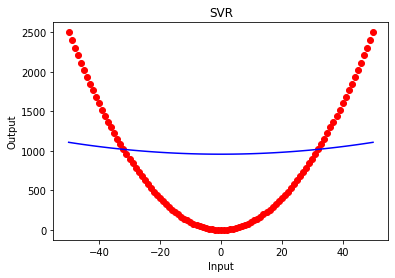

In [5]:
to_predict = 12
pred = svr.predict(to_predict)
print(f"b: {svr.intercept}")
print(f"Gamma: {svr.gamma_value} - Box: {svr.box}")
print(f'PREDICTION (INPUT = {to_predict})', pred)
pred = [float(svr.predict(np.array([x[i]]))) for i in range(x.size)]
print("LOSS:", svr.eps_ins_loss(pred))
plt.scatter(x, y , color="red")
plt.plot(x, pred, color="blue")
plt.title('SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

In [ ]:
import sklearn.svm as ss
regressor = ss.SVR(kernel = 'poly', degree=degree, gamma=1)

# sc_X = StandardScaler()
# sc_y = StandardScaler()
# xs = sc_X.fit_transform(x)
# ys = sc_y.fit_transform(y)
xs = x
ys = y

regressor.fit(xs, ys.ravel())
y_pred = regressor.predict(np.array([[to_predict]]))
print(f" b: {regressor.intercept_}")
print(f"Gamma: {regressor.get_params()['gamma']} - Box: {regressor.get_params()['C']}")
print(f'PREDICTION (INPUT = {to_predict})', y_pred)

plt.scatter(xs, ys, color = 'red')
plt.plot(xs, regressor.predict(xs), color = 'blue')
plt.title('SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

In [ ]:
print("eps:",regressor.epsilon)
print("b:",regressor.intercept_)
params = regressor.get_params()
print("gamma:",params['gamma'])
print("C:",params['C'])
print("sv:",regressor.support_vectors_)
print("supp index:",regressor.support_)

In [ ]:
params["coef0"]

In [ ]:
regressor.dual_coef_